# 📍 Logistic Regression
'모두를 위한 딥러닝2'의 'Lab05 Logistic Regression'을 듣고 정리한 코드입니다.
  
* 강의 링크: https://www.youtube.com/watch?v=HgPWRqtg254&list=PLQ28Nx3M4JrhkqBVIXg-i5_CVVoS1UzAv&index=8
* 블로그 링크: https://gaga.tistory.com/208

  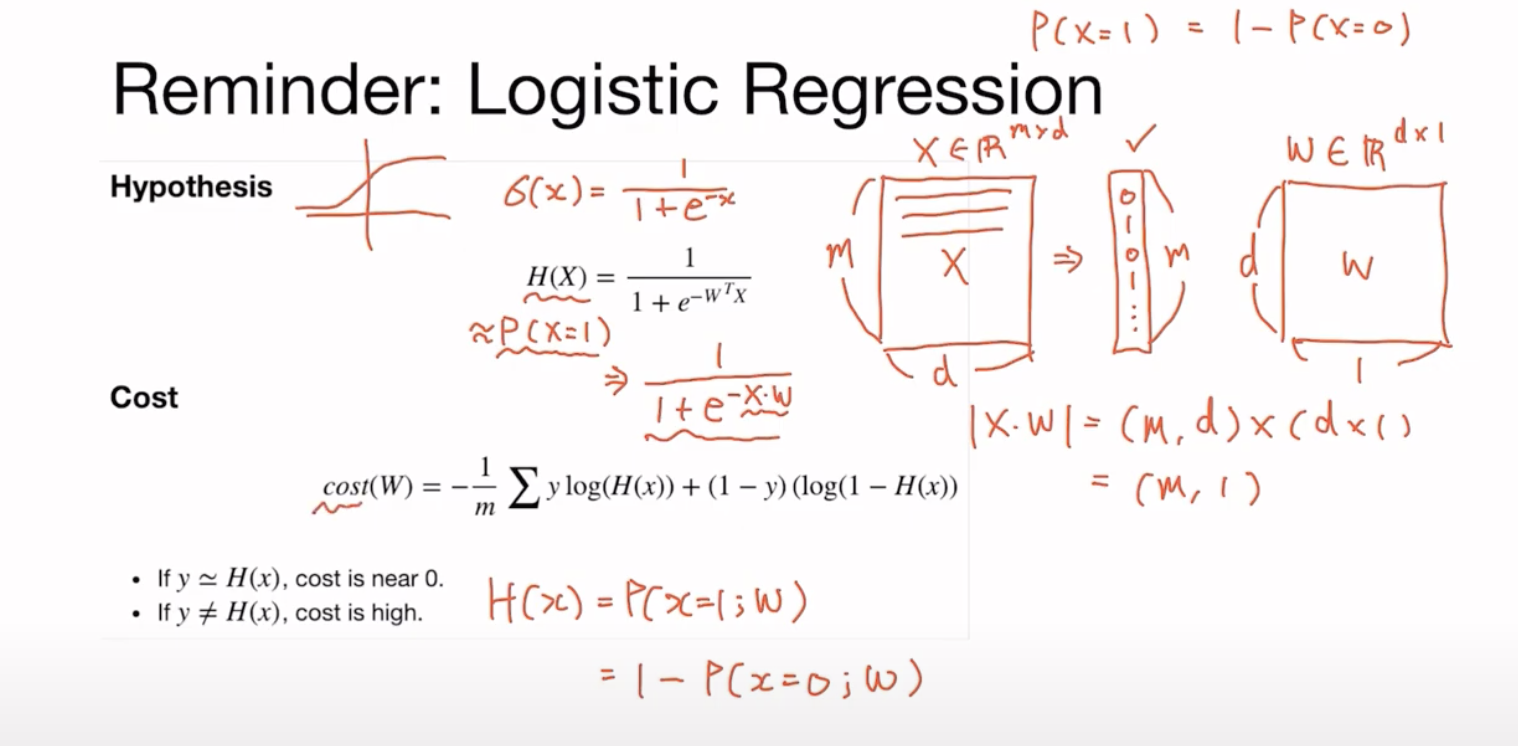


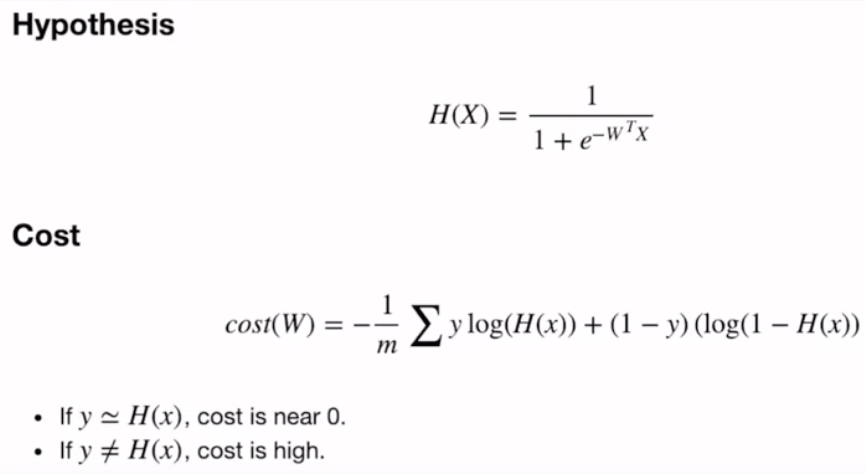

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
# For reproducibility
torch.manual_seed(1)

In [39]:
# |x_data| = (6, 2)
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
# |y_data| = (6,)
y_data = [[0], [0], [0], [1], [1], [1]]

In [40]:
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [41]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


## 1. Hypothesis
로지스틱 회귀에서는 시그모이드 함수를 사용하여 hypothesis를 사용한다.  
  
* **sigmoid(x) = 1 / (1 + np.exp(-x))**  
* **H(x) = sigmoid(Wx + b)**
  

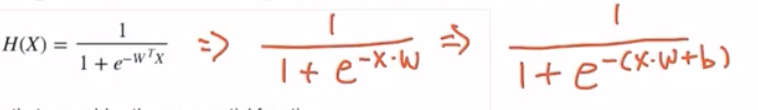

### torch.exp()
PyTorch has a torch.exp() function that resembles the exponential function.

In [7]:
print("e^1 equals: ", torch.exp(torch.FloatTensor([1])))

e^1 equals:  tensor([2.7183])


In [8]:
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [9]:
hypothesis = 1 / (1 + torch.exp(-x_train.matmul(W) + b))

In [10]:
print(hypothesis)
print(hypothesis.shape)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)
torch.Size([6, 1])


### torch.sigmoid()
Or, we could use torch.sigmoid() function! This resembles the sigmoid function.

In [11]:
print('1/(1+e^{-1}) equals:', torch.sigmoid(torch.FloatTensor([1])))

1/(1+e^{-1}) equals: tensor([0.7311])


In [12]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

In [13]:
print(hypothesis)
print(hypothesis.shape)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)
torch.Size([6, 1])


## 2. Cost Function
로지스틱 회귀에서는 로그 함수를 비용함수로 사용하는데, 선형 회귀와 마찬가지로 모든 오차의 평균을 구해 평균 제곱 오차를 사용하여 모든 오차의 평균을 비용 함수로 사용한다.  
  
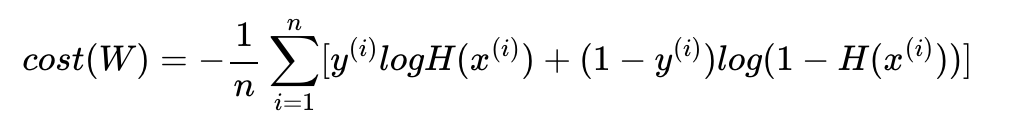

We want to measure the difference between hypothesis and y_train.

In [14]:
print(hypothesis)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


For one element, the loss can be computed as follows:

In [15]:
-(y_train[0] * torch.log(hypothesis[0]) +
 (1 - y_train[0]) * torch.log(1 - hypothesis[0]))

tensor([0.6931], grad_fn=<NegBackward0>)

To compute the losses for the entire batch, we can simply input the entire vector.

In [16]:
losses = -(y_train * torch.log(hypothesis) +
          (1 - y_train) * torch.log(1 - hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


Then, we just .mean() to take the mean of these individual losses.

In [17]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


### F.binary_cross_entropy(예측값, 실제값)
PyTorch에서는 로지스틱 회귀의 비용 함수를 torch.nn.functional 모듈에서 제공하고 있다.   
F.binary_cross_entropy(예측값, 실제값)과 같이 사용하면 된다.  
이를 줄여서 BCE라고도 부른다.

In [18]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

## Whole Trainig Procedure

In [19]:
# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# Optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

In [20]:
nb_epochs = 1000

for epoch in range(nb_epochs + 1):
    # cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b) # or .mm or @
    cost = F.binary_cross_entropy(hypothesis, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print("Epoch {:4d}/{} Cost: {:.6f}".format(
            epoch, nb_epochs, cost.item()))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


## Evaluation
After we finish trainig the model, we want to check how well our model fits the training set.

In [54]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b) # 원래는 x_train이 아니라 x_test
print(hypothesis[:5])

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01]], grad_fn=<SliceBackward0>)


We can change hypothesis (real number from 0 to 1) to binary predictions (either 0 or 1) by comparing them to 0.5

In [52]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [31]:
# 기존의 실제값과 동일하게 예측하였다.
print(prediction[:5].int())
print(y_train[:5])

tensor([[0],
        [0],
        [0],
        [1],
        [1]], dtype=torch.int32)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.]])


In [27]:
correct_prediction = prediction.float() == y_train
print(correct_prediction[:5])

tensor([[True],
        [True],
        [True],
        [True],
        [True]])


In [55]:
# 가중치
W

tensor([[3.2530],
        [1.5179]], requires_grad=True)

In [56]:
# 편향
b

tensor([-14.4819], requires_grad=True)

## 2. Higher Implementation with nn.Module

In [57]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [58]:
torch.manual_seed(1)

In [66]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

### nn.Sequential()
nn.Sequential()은 nn.Module 층을 차례로 쌓을 수 있도록 한다.  
다시 말해서 nn.Sequential()은 여러 함수들을 연결해주는 역할을 한다.

In [67]:
model = nn.Sequential(
    nn.Linear(2, 1), # input_dim=2, output_dim=1
    nn.Sigmoid() # 출력은 시그모이드 함수를 거친다
)

In [68]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

In [71]:
nb_epochs = 1000

for epoch in range(nb_epochs + 1):
    # H(x)
    hypothesis = model(x_train)
    
    # cost
    cost = F.binary_cross_entropy(hypothesis, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 20번마다 로그 출력
    if epoch % 20 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.010324 Accuracy 100.00%
Epoch   20/1000 Cost: 0.010226 Accuracy 100.00%
Epoch   40/1000 Cost: 0.010129 Accuracy 100.00%
Epoch   60/1000 Cost: 0.010035 Accuracy 100.00%
Epoch   80/1000 Cost: 0.009942 Accuracy 100.00%
Epoch  100/1000 Cost: 0.009850 Accuracy 100.00%
Epoch  120/1000 Cost: 0.009761 Accuracy 100.00%
Epoch  140/1000 Cost: 0.009673 Accuracy 100.00%
Epoch  160/1000 Cost: 0.009587 Accuracy 100.00%
Epoch  180/1000 Cost: 0.009502 Accuracy 100.00%
Epoch  200/1000 Cost: 0.009418 Accuracy 100.00%
Epoch  220/1000 Cost: 0.009337 Accuracy 100.00%
Epoch  240/1000 Cost: 0.009256 Accuracy 100.00%
Epoch  260/1000 Cost: 0.009177 Accuracy 100.00%
Epoch  280/1000 Cost: 0.009099 Accuracy 100.00%
Epoch  300/1000 Cost: 0.009023 Accuracy 100.00%
Epoch  320/1000 Cost: 0.008948 Accuracy 100.00%
Epoch  340/1000 Cost: 0.008874 Accuracy 100.00%
Epoch  360/1000 Cost: 0.008801 Accuracy 100.00%
Epoch  380/1000 Cost: 0.008729 Accuracy 100.00%
Epoch  400/1000 Cost: 0.008659 Accuracy 

In [72]:
model(x_train)

tensor([[2.0573e-05],
        [1.1495e-02],
        [1.3629e-02],
        [9.8386e-01],
        [9.9977e-01],
        [9.9998e-01]], grad_fn=<SigmoidBackward0>)

In [73]:
model(x_train) >= torch.FloatTensor([0.5])

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])

In [74]:
# W, b 값 확인
list(model.parameters())

[Parameter containing:
 tensor([[4.2823, 2.0549]], requires_grad=True),
 Parameter containing:
 tensor([-19.1836], requires_grad=True)]

## 3. Higher Implementation with Class
앞서 로지스틱 회귀 모델을 nn.Sequential을 사용하여 구현했는데, 이를 클래스를 구현하면 다음과 같다.  
  
이전 Lab에서도 언급했지만, 클래스 형태의 모델은 nn.Module을 상속받고, \_\_init\_\_()와 forward()를 정의해야 한다. H(x) 식에 입력 x로부터 예측된 y를 얻는 것을 forward 연산이라고 한다.

In [75]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [83]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [84]:
model = BinaryClassifier()

In [85]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 100

for epoch in range(nb_epochs + 1):
    # cost 계산
    hypothesis = model(x_train)
    cost = F.binary_cross_entropy(hypothesis, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 10번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5])
        correct_prediction = prediction.float() == y_train
        accuracy = correct_prediction.sum().item() / len(correct_prediction)
        print("Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}".format(
            epoch, nb_epochs, cost.item(), accuracy * 100))

Epoch    0/100 Cost: 1.054910 Accuracy 50.00
Epoch   10/100 Cost: 0.778791 Accuracy 66.67
Epoch   20/100 Cost: 0.568282 Accuracy 83.33
Epoch   30/100 Cost: 0.474668 Accuracy 83.33
Epoch   40/100 Cost: 0.389435 Accuracy 83.33
Epoch   50/100 Cost: 0.308680 Accuracy 83.33
Epoch   60/100 Cost: 0.236572 Accuracy 83.33
Epoch   70/100 Cost: 0.183316 Accuracy 100.00
Epoch   80/100 Cost: 0.155966 Accuracy 100.00
Epoch   90/100 Cost: 0.143136 Accuracy 100.00
Epoch  100/100 Cost: 0.133459 Accuracy 100.00


In [88]:
model(x_train) >= torch.FloatTensor([0.5])

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])

In [90]:
y_train

tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])